# 데이콘 온라인세일 정보 데이터분석

---

- 목차
    - 사전준비 및 read data
    - 이산형 변수 EDA
    - 연속형 변수 EDA
    - 연속형 변수 회귀분석

---

# 사전준비 및 read data

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 한글깨짐해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [283]:
df = pd.read_csv('C:\\Users\\minu\\lab\\dacon0210\\Onlinesales_info.csv')
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [6]:
df.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태'], dtype='object')

In [7]:
df.shape

(52924, 9)

In [9]:
df.isnull().sum(axis=0)

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
dtype: int64

- 데이터 변수
    - 이산형 변수 : 고객, 거래, 제품, 카테고리, 쿠폰상태
    - 연속형 변수 : 수량, 평균금액, 배송료

---

In [284]:
class df_tool():
    def __init__(self,df,feature1):
        self.df = df.reset_index()
        self.feature1 = feature1
        
    def DFcount(self):
        df_count= self.df.groupby(self.feature1).count().sort_values('index',ascending=False)[['index']]
        print('{}의 중복되지 않는 수 :'.format(self.feature1),df_count.shape[0])
        self.df_count = df_count
        return self.df_count
    
    def DFdistribution(self,n):
        #print('{} 집계 수의 히스토그램'.format(self.feature1))
        fig, ax = plt.subplots(1,2,figsize=(8, 6))
        #hist= self.df_count.hist(bins=n)
        ax[0].hist(self.df_count,n)
        ax[1].boxplot(self.df_count, labels =' ')

---

# 이산형 변수 EDA

### 고객ID

In [285]:
tool1 = df_tool(df,'고객ID')
tool1.DFcount().head()

고객ID의 중복되지 않는 수 : 1468


,index
고객ID,
USER_0118,695
USER_0736,587
USER_0563,575
USER_1355,572
USER_0643,523


In [299]:
tool1.df_count.describe()

,index
count,1468.000000
mean,36.051771
std,50.885680
min,1.000000
25%,10.000000
50%,21.000000
75%,46.000000
max,695.000000


- 평균적인 고객의 이커머스의 이용은 36회이다
- 단 최댓값이 매우 높은 것으로 특정 고객이 이용률이 매우 높다
- 이용률이 높은 고객과 낮은 고객이 어떤 특성을 지닌지 확인해볼만 하다.

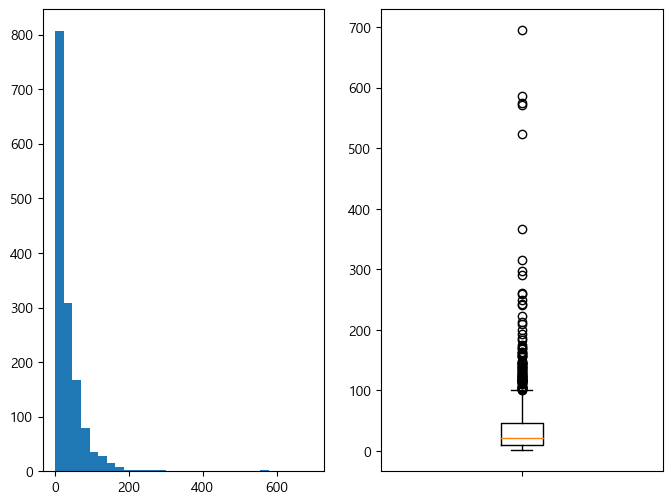

In [286]:
tool1.DFdistribution(30)

- 특정 고객이 매우 높은 거래율을 보여준다.
- 대부분이 주문율이 0~30회 구간에 쏠려있는 것을 확인할 수 있다

---

### 거래ID

- 고객 ID와 거래 ID의 차이를 정확히 인지할 필요가 있다
- 아직까진 정확히 무슨 기준으로 나누어진 것인지 애매하다.
- 같은 고객 ID여도 거래 ID의 차이가 있고 반대로 같은 거래 ID이지만 고객 ID가 다른경우가 있다. 
- 고객의 특성을 볼 때 고객 ID를 활용할 수 있고 거래와 관련된 특성을 확인할 때 거래 ID가 필요해보인다.
- 일단 거래ID가 고객이 구매를 진행할 때 나온 기록 데이터라고 가정하고 분석을 하도록 하겠음

In [307]:
tool2 = df_tool(df,'거래ID')
tool2.DFcount().head()

거래ID의 중복되지 않는 수 : 25061


,index
거래ID,
Transaction_12261,35
Transaction_4716,30
Transaction_19047,29
Transaction_13487,28
Transaction_16759,27


In [308]:
tool2.df_count.describe()

,index
count,25061.000000
mean,2.111807
std,2.177670
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,35.000000


- 평균적인 거래는 2회
- 상위 75%의 값또한 2회로 쏠려 있고 중앙값은 1회이므로 분포자체가 오른쪽이 매우긴 분포가 예상되어진다.
- 특정 고객만이 계속 이커머스를 통해 거래를 하는 경향이 있다는 것을 알 수 있음
- 그 특정 고객이 가진 특성과 다른 일반 고객의 특성의 차이가 무엇인지 확인이 필요해보인다

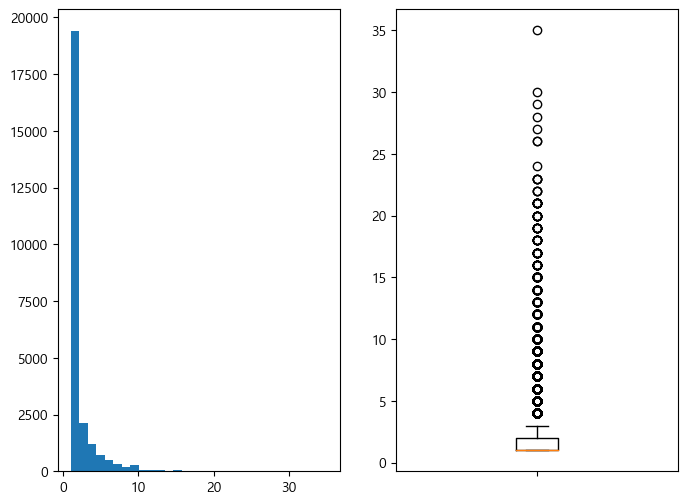

In [310]:
tool2.DFdistribution(30)

---

### 제품 ID

In [235]:
tool3 = df_tool(df,'제품ID')
tool3.DFcount().head()

제품ID의 중복되지 않는 수 : 1145


,index
제품ID,
Product_0981,3511
Product_0983,3328
Product_0976,3230
Product_0984,1361
Product_0989,1089


- 제품 ID의 카운트가 높을수록 구매자가 많다라고 볼 수 있거나 특정 고객이 대량을 구매한다라고 볼 수 있다.

In [313]:
tool3.df_count.describe()

,index
count,1145.000000
mean,46.221834
std,193.262109
min,1.000000
25%,6.000000
50%,15.000000
75%,32.000000
max,3511.000000


- 평균은 46회
- 중앙값이 15회, 75% 값이 32회인 것으로 보아 마찬가지로 오른쪽이 매우 긴 분포를 형성하고 있겠다.
- 즉 몇몇 제품이 압도적인 구매율을 나타낸다는 것으로 볼 수 있다.

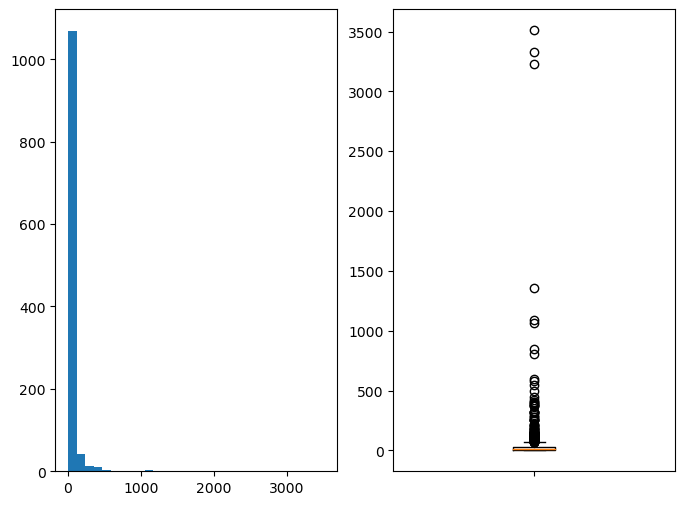

In [236]:
tool3.DFdistribution(30)

---

### 제품카테고리

In [237]:
tool4 = df_tool(df,'제품카테고리')
tool4.DFcount().head()

제품카테고리의 중복되지 않는 수 : 20


,index
제품카테고리,
Apparel,18126
Nest-USA,14013
Office,6513
Drinkware,3483
Lifestyle,3092


In [320]:
tool4.df_count.index.values

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Nest',
       'Bags', 'Headgear', 'Notebooks & Journals', 'Waze', 'Nest-Canada',
       'Bottles', 'Accessories', 'Fun', 'Gift Cards', 'Housewares',
       'Google', 'Backpacks', 'More Bags', 'Android'], dtype=object)

- 제품 카테고리는 다른 이산형변수보다 변수 폭이 좁다

In [323]:
tool4.df_count.describe()

,index
count,20.000000
mean,2646.200000
std,4915.767912
min,43.000000
25%,149.750000
50%,435.500000
75%,2421.500000
max,18126.000000


- 평균은 약 2646회
- 중앙값이 435회, 75% 값이 2421회인 것으로 보아 마찬가지로 오른쪽이 매우 긴 분포를 형성하고 있겠다.
- 즉 몇몇 제품의 카테고리가 압도적인 구매율을 보여줄 것으로 보인다

<Axes: ylabel='제품카테고리'>

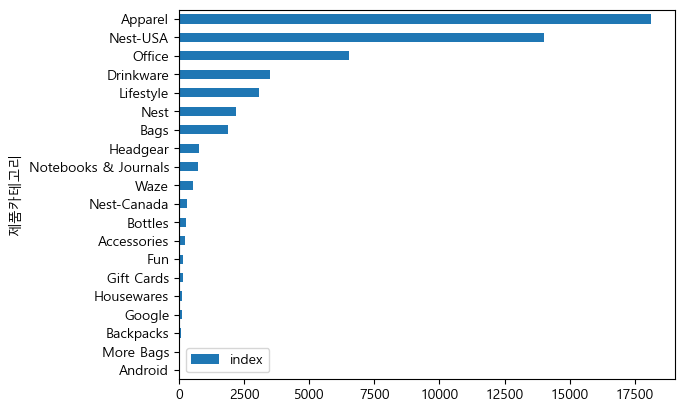

In [326]:
tool4.df_count.sort_values('index').plot(kind = 'barh')

- 제품 카테고리의 바그래프이다.
- Apparel, Nest-usa, office, drinkware, lifestyle순으로 가장 많은 카테고리를 차지하고 있다.

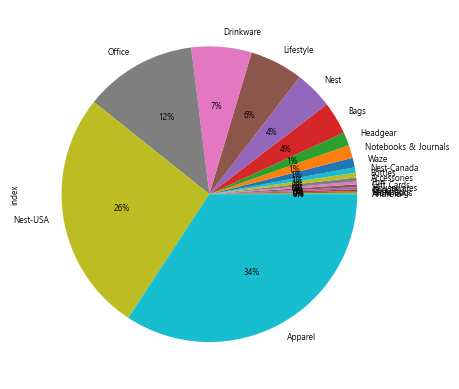

<Figure size 2000x2000 with 0 Axes>

In [378]:
tool4.df_count.sort_values('index')['index'].plot(kind = 'pie',autopct='%1.f%%')
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 6})

plt.show()

- 파이차트이다
- 인기 카테고리 5개가 85%를 차지하고 있다

---

### 쿠폰상태

In [239]:
tool5 = df_tool(df,'쿠폰상태')
tool5.DFcount().head()

쿠폰상태의 중복되지 않는 수 : 3


,index
쿠폰상태,
Clicked,26926
Used,17904
Not Used,8094


In [395]:
clicked_but_not_used= tool5.df_count.iloc[0,:] - tool5.df_count.iloc[1,:]
not_click_and_not_used= clicked_but_not_used - tool5.df_count.iloc[2,:]
print('쿠폰을 클릭했지만 사용하지 않음',clicked_but_not_used.values)
print('쿠폰을 클릭조차 하지 않음',not_click_and_not_used.values)

쿠폰을 클릭했지만 사용하지 않음 [9022]
쿠폰을 클릭조차 하지 않음 [928]


- 쿠폰의 이용 상태이다,
    - 쿠폰을 클릭한 횟수는 26926회
    - 사용한 횟수는 17904회
    - 사용하지 않은 횟수는 8094회이다.
- 여기서 쿠폰을 사용하기 위해서는 클릭을 해야하기 때문에 used는 clicked와 관련이 있다.
- 또한 clicked에서 used를 뺀 값은 쿠폰을 클릭하고도 사용하지 않은 횟수이며 이는 not used값과 다름

In [420]:
coupon_values= np.concatenate([tool5.df_count.values.flatten(),clicked_but_not_used.values,not_click_and_not_used.values],axis=0)
coupon_index= tool5.df_count.index.values.flatten().tolist() +['clicked_not_used','No_clicked']

df_coupon = pd.DataFrame({'coupon':coupon_values},coupon_index)

<Axes: >

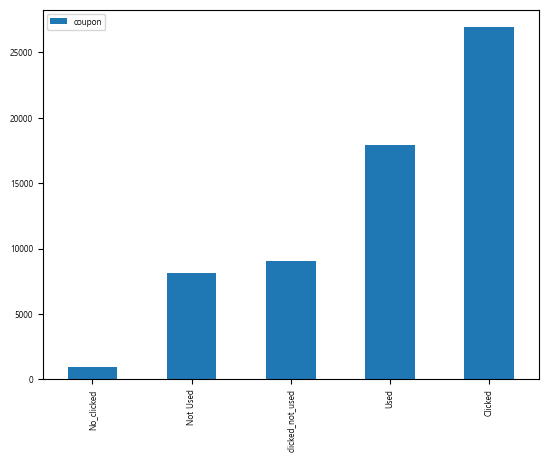

In [422]:
df_coupon.sort_values('coupon').plot(kind = 'bar')

- 쿠폰의 이용 현황을 나타낸 바그래프이다

---

# 연속형 변수 EDA

### EDA

In [433]:
df_con = df.loc[:,['수량','평균금액','배송료']]
df_con.describe()

,수량,평균금액,배송료
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


- 수량, 평균금액, 배송료 변수 전부다 평균보다 중앙값이 더 낮은 공통점이 존재한다
- 분포는 오른쪽이 긴꼬리를 형성할 것이고 기준은 평균보다 중앙값을 잡는 것이 좋아보인다

`-` 수량
- 수량은 맥시멈 값이 상당히 높은데 대량구매로 보여진다. 고객의 특성이 도매업, 소매업, 또는 대량 구매를 하는 쪽일 것이다.
- 대체적으로 구매할 때 수량은 2개를 넘지 않을 것

`-` 평균금액
- 평균금액은 물건 하나의 평균적인 금액을 의미한다.
- 금액에 따른 수량 또는 금액에 따른 고객의 특성을 볼 수 있겠다

`-` 배송료
- 배송료는 배송료가 측정되어지는 기준이 중요해보인다
- 운송하는 거리, 산간지역이나 섬 등 지역의 특성을 고려해서 배송료가 큰 편차로 벌어질 것

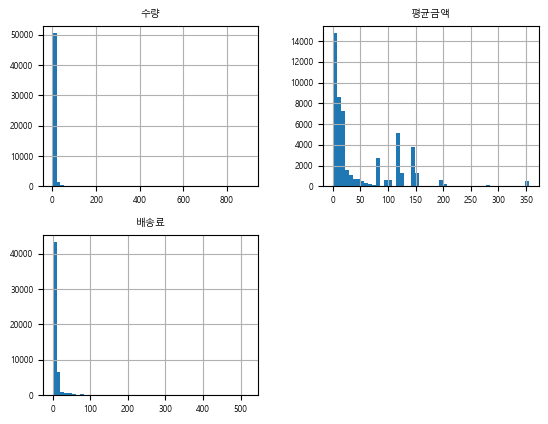

In [437]:
df_con.hist(bins=50);

- 수량과 배송료는 극단적으로 분포가 매우 치우쳐져 있다
- 평균금액 또한 마찬가지로 왼쪽에 쏠려 있지만 중앙에 봉우리 하나가 더 형성되있다.
    - 이는 대부분의 많은 구매 물품은 저가로 형성되어있지만 특정 어떤 물품인 경우는 사람들이 비싸더라도 많이 구매하는 것으로 볼 수 있다

---

### 연속형 변수 산점도

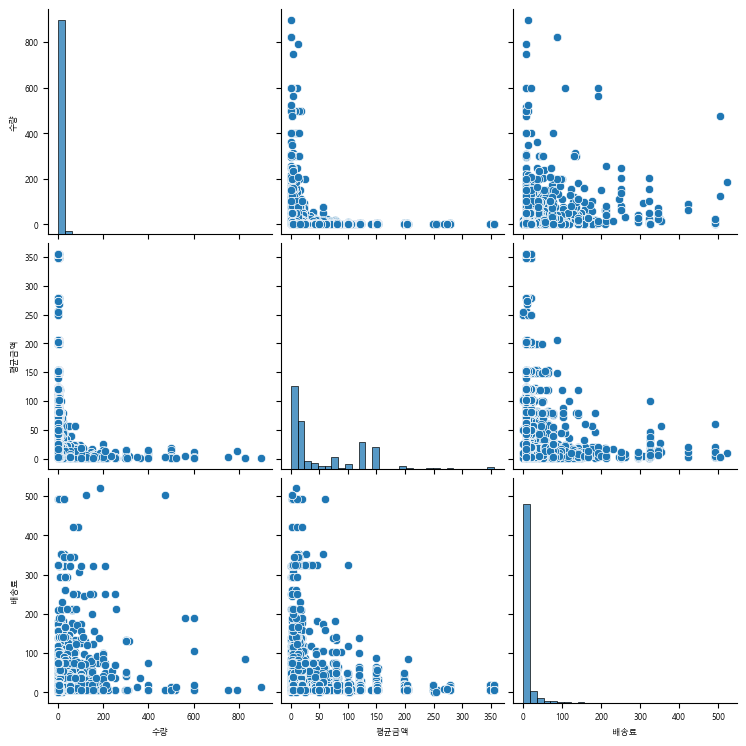

In [472]:
import seaborn as sns
sns.pairplot(df_con,diag_kws={'bins': 30});


- 변수들 간의 상관관계가 두드러지는 특징이 관찰되지 않는다

In [461]:
df_con.corr()

,수량,평균금액,배송료
수량,1.000000,-0.113996,0.191383
평균금액,-0.113996,1.000000,-0.107799
배송료,0.191383,-0.107799,1.000000


- 상관관계의 구체적인 수치 또한 서로 큰 상관성이 있다고 보이지 않는다

- 이는 보통 물건의 금액이 비싸면 배송료가 싸다는 것이나 또는 배송료가 비싸다는 것은 물건의 금액이 비싸다라는 인식은 맞지 않다고
말하는 지표라고 볼 수 있다

- 다만 이는 물건의 카테고리에 따라 다를 수가 있겠는데, 어떤 물건은 가격은 비싸지만 운송이 어려워 배송료가 높아질 수도 있고 어떤 물건은 가격은 비싸더라도 운송이 쉬워 배송료가 낮아질 수가 있다. 따라서 물건을 카테고리로 나눠서 다시 변수간의 관계를 보는 것이 좋아보인다

---

# 연속형 변수 회귀분석

- 각 변수를 타겟으로 설정하여 회귀분석 모형을 돌린 결과이다
- 해당 결과로 타겟과 설명변수가 어떤 사이에 있는지를 대략 알 수 있는 지표가 된다

In [447]:
import statsmodels.api as sm
from statsmodels.formula.api import *


### 평균금액 타겟

In [452]:
m1 =ols('평균금액 ~수량+배송료',df_con).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   평균금액   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     558.5
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          9.75e-241
Time:                        15:16:33   Log-Likelihood:            -2.9465e+05
No. Observations:               52924   AIC:                         5.893e+05
Df Residuals:                   52921   BIC:                         5.893e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.7105      0.315    180.179      0.000      56.094      57.327
수량            -0.3085      0.014    -22.112      0.000      -0.336      -0.281
배송료           -0.2933      0.014    -20.364      0.000      -0.322      -0.265
==============================================================================
Omnibus:                    16449.346   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49211.380
Skew:                           1.630   Prob(JB):                         0.00
Kurtosis:                       6.418   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 결정계수가 매우 낮음 변수의 변동성을 잘 설명한 것은 아니다
- 하지만 각 변수의 t-value가 매우 높다. f 통계량도 매우 높다
- 이는 각 변수 끼리의 관계 자체는 서로 유의한 어떤 점이 있을 것으로 보임
- 또한 수량과 배송료의 계수가 음수인 것으로 보아 금액이 증가할 수록 수량 또는 배송료는 감소하는 관계에 있다고 볼 수 있다

---

### 수량 타겟

In [480]:
m2 =ols('수량 ~평균금액+배송료',df_con).fit()

m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     수량   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1260.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:35:33   Log-Likelihood:            -2.3269e+05
No. Observations:               52924   AIC:                         4.654e+05
Df Residuals:                   52921   BIC:                         4.654e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0802      0.123     33.253      0.000       3.840       4.321
평균금액          -0.0297      0.001    -22.112      0.000      -0.032      -0.027
배송료            0.1871      0.004     42.416      0.000       0.178       0.196
==============================================================================
Omnibus:                   114084.552   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        666683222.028
Skew:                          19.342   Prob(JB):                         0.00
Kurtosis:                     551.481   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 위 첫번째 모델과 같이 모형자체의 적합성을 논하기 어렵다
- 변수들의 계수가 금액은 음수이고 배송료는 양수이다
    - 물건의 수량이 증가할 때마다, 평균금액은 떨어지고 배송료는 오른다는 것
    - 이는 대량 구입하면 할인을 더 붙일 수 있다는 의미이고, 물건의 개수는 많으니 배송할 때 양이 많아져 배송료는 오를수 있다는 의미로 해석되어진다

---

### 배송료 타겟

In [484]:
m3 =ols('배송료 ~평균금액+수량',df_con).fit()

m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    배송료   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1221.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:36:41   Log-Likelihood:            -2.3104e+05
No. Observations:               52924   AIC:                         4.621e+05
Df Residuals:                   52921   BIC:                         4.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1117      0.110    100.971      0.000      10.896      11.327
평균금액          -0.0265      0.001    -20.364      0.000      -0.029      -0.024
수량             0.1758      0.004     42.416      0.000       0.168       0.184
==============================================================================
Omnibus:                    89720.174   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93311016.587
Skew:                          11.711   Prob(JB):                         0.00
Kurtosis:                     207.368   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 모형의 적합성은 위 모델들처럼 논하기가 어렵다
- 변수간의 관계는 평균금액이 음수, 수량이 양수이다.
    - 2번째 모델 설명과 일치한다